<a href="https://colab.research.google.com/github/umayu06/Object-Detection/blob/master/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


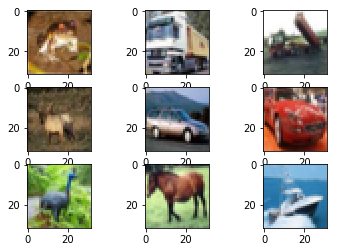

In [17]:
from matplotlib import pyplot
from keras.datasets import cifar10
# load dataset
(trainX, trainY), (testX, testY) = cifar10.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Test: X=%s, y=%s' % (testX.shape, testY.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i])
# show the figure
pyplot.show()

In [0]:
from keras.utils import to_categorical

In [0]:
# load train and test dataset
#def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	#return trainX, trainY, testX, testY

In [0]:
#def prep_pixels(train, test):
	# convert from integers to floats
trainX = trainX.astype('float32')
testX= testX.astype('float32')
	# normalize to range 0-1
trainX = trainX/ 255.0
testX = testX/ 255.0
	# return normalized images
	#return train_norm, test_norm

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from keras.constraints import max_norm
from keras import optimizers

In [22]:
#def define_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=max_norm(3)))
  model.add(Dropout(0.2))
  model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=max_norm(3)))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(512, activation='relu', kernel_constraint=max_norm(3)))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='softmax'))
  # Compile model
  epochs = 25
  lrate = 0.01
  decay = lrate/epochs
  sgd = optimizers.SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
  model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
  print(model.summary())
  #return model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_7 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
__________

In [34]:
history=model.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 11s 221us/step - loss: 0.1450 - acc: 0.9557 - val_loss: 1.3479 - val_acc: 0.7094
Epoch 2/25
50000/50000 [==============================] - 11s 219us/step - loss: 0.1303 - acc: 0.9582 - val_loss: 1.3374 - val_acc: 0.7111
Epoch 3/25
50000/50000 [==============================] - 11s 218us/step - loss: 0.1257 - acc: 0.9599 - val_loss: 1.3199 - val_acc: 0.7112
Epoch 4/25
50000/50000 [==============================] - 11s 218us/step - loss: 0.1234 - acc: 0.9605 - val_loss: 1.3173 - val_acc: 0.7102
Epoch 5/25
50000/50000 [==============================] - 11s 220us/step - loss: 0.1177 - acc: 0.9617 - val_loss: 1.3216 - val_acc: 0.7102
Epoch 6/25
50000/50000 [==============================] - 11s 223us/step - loss: 0.1103 - acc: 0.9636 - val_loss: 1.3136 - val_acc: 0.7094
Epoch 7/25
50000/50000 [==============================] - 11s 218us/step - loss: 0.1083 - acc: 0.9653 - val_loss: 1.

In [24]:
acc = model.evaluate(testX, testY, verbose=0)
print(acc)



[1.062272375869751, 0.7056]


https://machinelearningmastery.com/object-recognition-convolutional-neural-networks-keras-deep-learning-library/

https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/

https://machinelearningmastery.com/how-to-perform-object-detection-with-yolov3-in-keras/

In [0]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

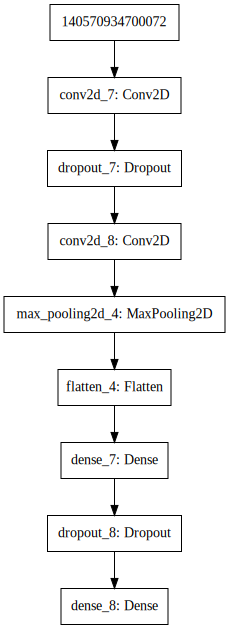

In [30]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))


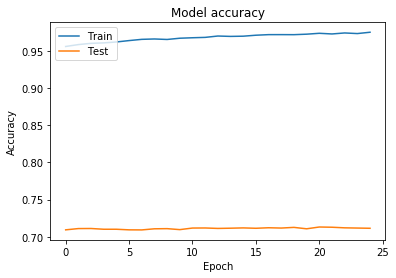

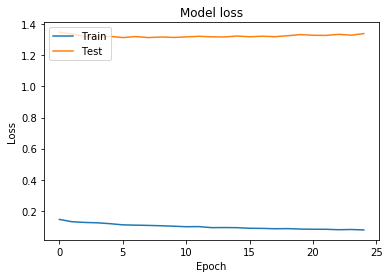

In [35]:
import matplotlib.pyplot as plt

#history = model.fit(trainX, trainY, validation_split=0.25, epochs=50, batch_size=32, verbose=0)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()